In [1]:
pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [3]:
##import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
##divide the dataset into independent and dependent features
X= dataset.iloc[:,3:13]
Y= dataset.iloc[:,13]

In [11]:
Y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [21]:
##feature engineering
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

KeyError: 'Geography'

In [22]:
X=X.drop(['Geography','Gender'], axis = 1)  #axis = 1 for drop only column, raw remains the same

KeyError: "['Geography', 'Gender'] not found in axis"

In [23]:
pd.concat([X,geography,gender],axis = 1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


In [24]:
  ##splitting the dataset into train and test dataset
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [25]:
##feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [28]:
X_train.shape

(8000, 8)

Creating the ANN

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Dense
from tensorflow.keras.models import LeakyReLU,ELU,PReLU,ReLU
from tensorflow.keras.models import Dropout

ImportError: cannot import name 'Dense' from 'tensorflow.keras.models' (/usr/local/lib/python3.10/dist-packages/keras/_tf_keras/keras/models/__init__.py)

In [30]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LeakyReLU,ELU,PReLU,ReLU
from tensorflow.keras.layers import Dropout

In [31]:
##initialise the ANN
classifier = Sequential()

In [33]:
## add the input layer
classifier.add(Dense(units = 11, activation = 'relu'))

In [34]:
## add the first Hidden layer
classifier.add(Dense(units = 7, activation='relu'))

In [35]:
##adding the second hidden layer
classifier.add(Dense(units=6, activation = 'relu'))

In [36]:
##adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [38]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # default learning rate

In [43]:
##adding the manual learning rate
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [44]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
model_history = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs = 1000, callbacks= early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8735 - loss: 0.3267 - val_accuracy: 0.8436 - val_loss: 0.3979
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8649 - loss: 0.3312 - val_accuracy: 0.8444 - val_loss: 0.3853
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8671 - loss: 0.3277 - val_accuracy: 0.8470 - val_loss: 0.3872
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8657 - loss: 0.3335 - val_accuracy: 0.8455 - val_loss: 0.3897
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8650 - loss: 0.3360 - val_accuracy: 0.8448 - val_loss: 0.3945
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8584 - loss: 0.3436 - val_accuracy: 0.8417 - val_loss: 0.3957
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8595 - loss: 0.3418 - val_accuracy: 0.8478 - val_loss: 0.4059
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8563 - loss: 0.3525 - 

Stop training when a monitored metric has stopped improving.

In [47]:
##early stopping-- when the accuracy is not increasing at all, the model get autmatically stops

import tensorflow as tf
import keras

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [50]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 0, 'epoch')

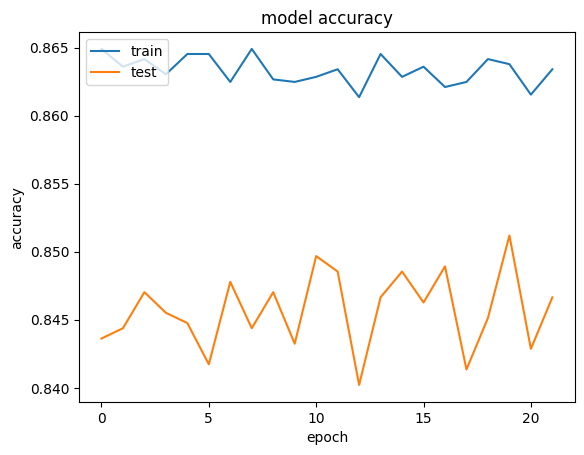

In [52]:
##summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc = 'upper left')
plt.xlabel('epoch')

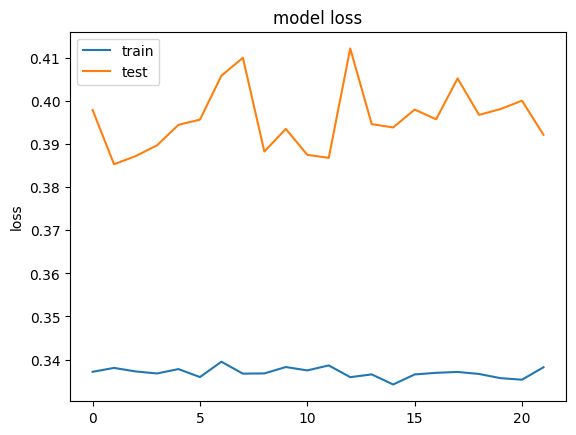

In [53]:
##summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.legend(['train','test'], loc = 'upper left')

In [54]:
##making the predction and evaluting the model
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [56]:
##make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[1560,   35],
       [ 255,  150]])

In [58]:
##calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test,y_pred)
score

0.855